<a href="https://colab.research.google.com/github/Aniebiet1/Breast-Cancer-Prediction/blob/main/Churn_Prediction_For_Bank_Customers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part1: Data Preprocessing

Dataset=https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers

## Import Libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
dataset = pd.DataFrame(dataset)

## Data Exploration


In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.shape

(10000, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
len(dataset.select_dtypes(include='object').columns)

3

In [ ]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
len(dataset.select_dtypes(include=['int64','float64']).columns)

11

In [ ]:
# statistical Summary
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Dealing with missing data

In [ ]:
dataset.isnull().values.any()

False

In [ ]:
dataset.isnull().values.sum()

0

## Encode the categorical data

In [ ]:
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Removing data that are not statistically related to the Target variable
dataset = dataset.drop(columns=['Surname', 'RowNumber', 'CustomerId'])

In [ ]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
# Checking for unit values in categorical column
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
print(dataset.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [ ]:
# One Hot Encoding
dataset = pd.get_dummies(data=dataset, drop_first=True, dtype=int)


In [ ]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
dataset.shape

(10000, 12)

## Countplot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

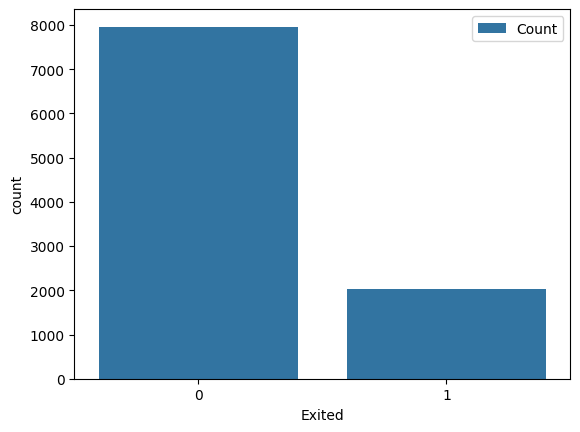

In [ ]:
sns.countplot(data=dataset, x= 'Exited', label = 'Count')
plt.plot

In [ ]:
# To get exact count
## Customers Staying with the bank
(dataset.Exited == 0).sum()

7963

In [ ]:
# Customers who left the bank
(dataset.Exited == 1 ).sum()

2037

## Correlation matrix and heatmap

In [ ]:
dataset_2 = dataset.drop(columns='Exited')

<Axes: title={'center': 'Correlated with Exited'}>

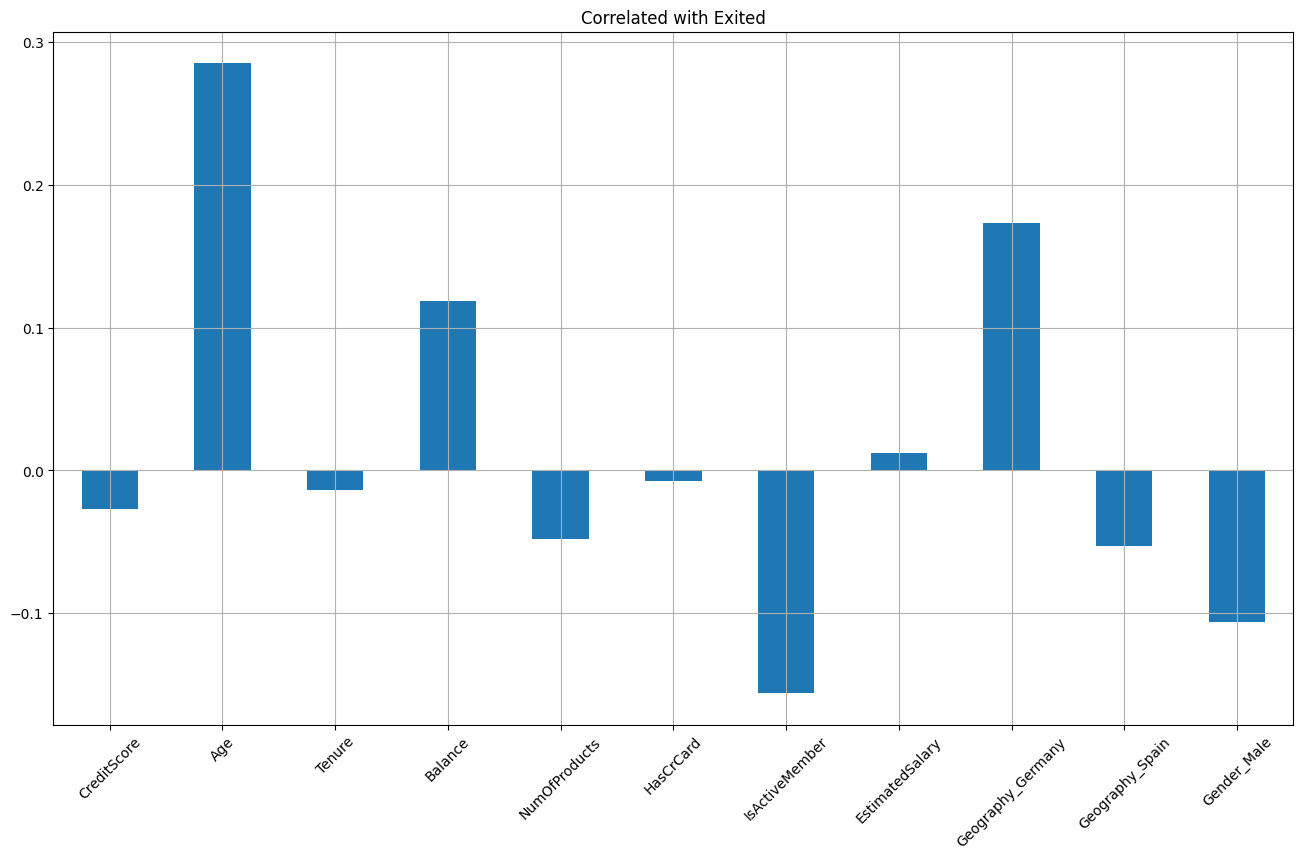

In [ ]:
dataset_2.corrwith(dataset['Exited']).plot.bar(
    figsize=(16,9), title='Correlated with Exited', rot=45, grid=True
)

In [ ]:
corr = dataset.corr()

<Axes: >

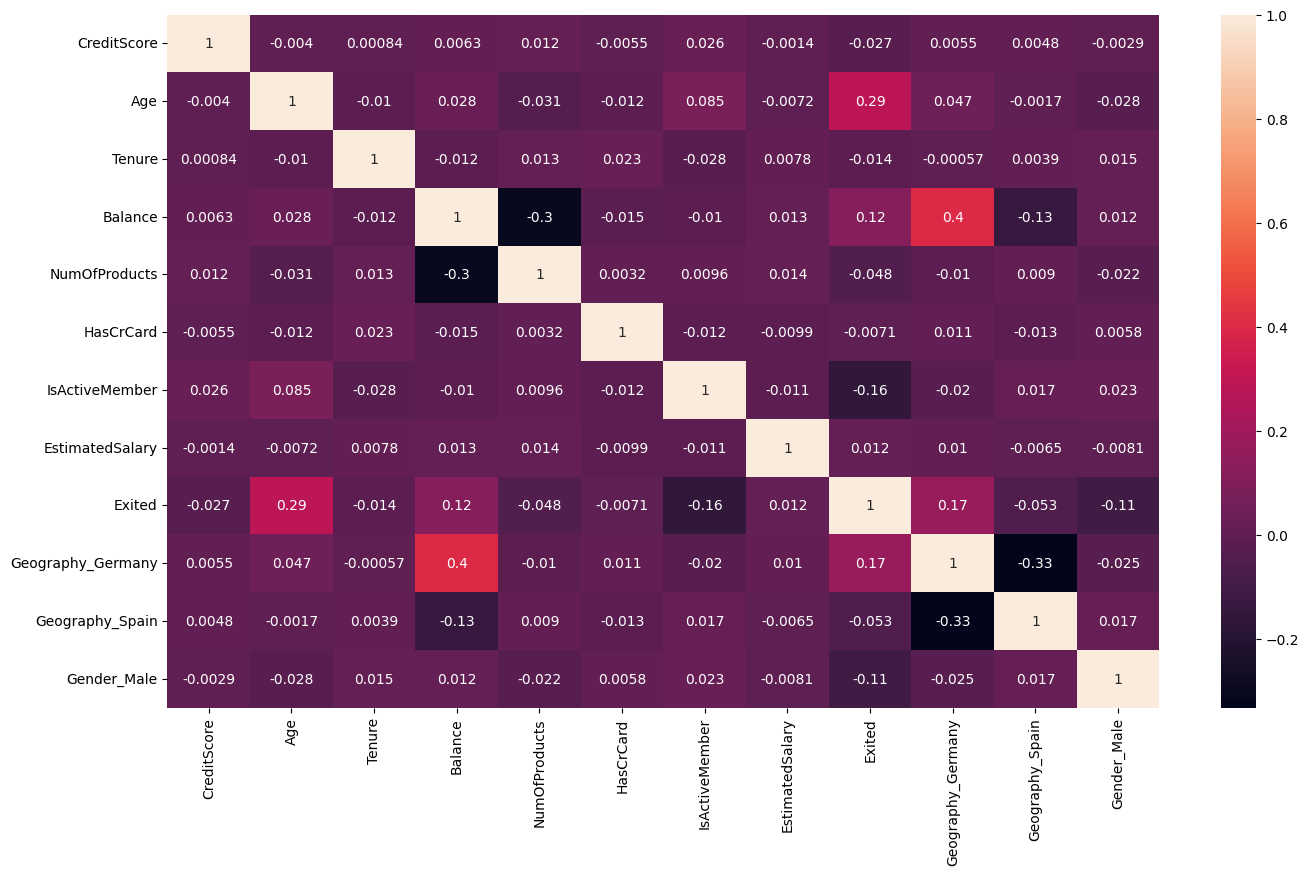

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

## Splitting the Dataset

In [ ]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
# Independent variable  / Matrix of featuers
x = dataset.drop(columns='Exited')

In [ ]:
# dependent/target Variable
y = dataset['Exited']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
x_test.shape

(2000, 11)

In [ ]:
y_train.shape

(8000,)

In [ ]:
y_test.shape

(2000,)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

# Part2: Building the model

## 1)Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier_lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
acc = accuracy_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )


In [ ]:
result = pd.DataFrame([['Logistic regression', acc, f1, prec, rec]],
                      columns=['Model', 'Accuracy', 'F1', 'precision', 'Recall'])

In [ ]:
result

,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.811,0.336842,0.581818,0.237037


In [ ]:
cm = confusion_matrix(y_test, y_pred )
print(cm)

[[1526   69]
 [ 309   96]]


### cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_lr, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 80.84 %
Standard Deviation is 0.88 %


## 2) Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = classifier_rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
acc = accuracy_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )

In [ ]:
model_result = pd.DataFrame([['Random Forest', acc, f1, prec, rec]],
                      columns=['Model', 'Accuracy', 'F1', 'precision', 'Recall'])

In [ ]:
results = pd.concat([result, model_result], ignore_index=True)

In [ ]:
results

,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.811,0.336842,0.581818,0.237037
1,Random Forest,0.867,0.613372,0.745583,0.520988


In [ ]:
cm = confusion_matrix(y_test, y_pred )
print(cm)

[[1523   72]
 [ 194  211]]


### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_rf, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 85.96 %
Standard Deviation is 1.02 %


## 3) XGBoost

Documentation: https://xgboost.readthedocs.io/en/stable/

XGBoost is an implementation of Gradient Boosted Decision Tree  designed for speed and performance that is dominative in competitive machine learning

In [ ]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(base_score=0.5,booster='gbtree',learning_rate=0.1,
gamma=0, max_depth=3, n_estimators=100)
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = classifier_xgb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [ ]:
acc = accuracy_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )

In [ ]:
model_result2 = pd.DataFrame([['XGBoost Clasifier', acc, f1, prec, rec]],
                      columns=['Model', 'Accuracy', 'F1', 'precision', 'Recall'])

In [ ]:
results = pd.concat([result, model_result, model_result2], ignore_index=True)

In [ ]:
results

,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.811,0.336842,0.581818,0.237037
1,Random Forest,0.867,0.613372,0.745583,0.520988
2,XGBoost Clasifier,0.868,0.612903,0.754513,0.516049


In [ ]:
cm = confusion_matrix(y_test, y_pred )
print(cm)

[[1527   68]
 [ 196  209]]


### cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_xgb, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 86.30 %
Standard Deviation is 0.88 %


# Part3: Randomized Search to find best parameters(XGBoost Classifier)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = {
'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
'max_depth':[3,4,5,6,7,8,10,12,15],
'min_child_weight':[1,3,5,7],
'gamma':[0.0,0.1,0.2,0.3,0.4],
'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [ ]:
parameters

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth': [3, 4, 5, 6, 7, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}

In [ ]:
randomized_search = RandomizedSearchCV(estimator=classifier_xgb, param_distributions=parameters,
n_jobs=-1,n_iter=10,scoring='roc_auc',cv=15,verbose=3)

In [ ]:
randomized_search.fit(x_train, y_train)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


RandomizedSearchCV(cv=15,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
randomized_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
randomized_search.best_params_

{'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [ ]:
randomized_search.best_score_

0.8648100693293429

# Part4: Final model(XGBoost Classifier)

In [ ]:
from xgboost import XGBClassifier

classifier = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=0, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0)
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=5, missing=0,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )

In [ ]:
Final_Model = pd.DataFrame([['Final XGBoost Clasifier', acc, f1, prec, rec]],
                      columns=['Model', 'Accuracy', 'F1', 'precision', 'Recall'])
results = pd.concat([result, model_result, model_result2, Final_Model], ignore_index=True)


In [ ]:
results

,Model,Accuracy,F1,precision,Recall
0,Logistic regression,0.811,0.336842,0.581818,0.237037
1,Random Forest,0.867,0.613372,0.745583,0.520988
2,XGBoost Clasifier,0.868,0.612903,0.754513,0.516049
3,Final XGBoost Clasifier,0.867,0.600601,0.766284,0.493827


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1534   61]
 [ 205  200]]


## cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 86.29 %
Standard Deviation is 1.02 %


# Part5: Predicting single observations

In [ ]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [148]:
single_obs=[[ 619, 42, 2, 0.00, 1, 1, 1, 101348.88, 0, 0, 0]]

In [149]:
single_obs

[[619, 42, 2, 0.0, 1, 1, 1, 101348.88, 0, 0, 0]]

In [151]:
classifier.predict(sc.transform(single_obs))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [159]:
Single_obs=[[502, 42,  8,   159660.80,   3,   1,   0,   113931.57,     0,   0,  0]]

In [160]:
Single_obs

[[502, 42, 8, 159660.8, 3, 1, 0, 113931.57, 0, 0, 0]]

In [161]:
classifier.predict(sc.transform(Single_obs))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])